# UFRGS - PPGEE - ENG405
### K-means | Túlio Dapper e Silva (194878)

# Import Libraries

In [1]:
import collections
import numpy as np
import numpy.linalg as la
import random as ra
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Random Data
Creates random data for $K_r$ centers defined by the user.

Generated data (o: Data | +: Center)


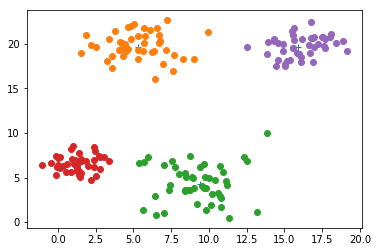

In [10]:
%matplotlib inline

#######################
### USER DEFINITION ###
#######################

# Define Y and Y limits
limXYZ = np.array([[0,20],[0,20],[0,20]])
# Define number of points limits
limN = [40,50]
# Define standard deviation
limS = [1,2]
# Number of real centers
Kr = 4

######################
### END            ###
######################

# Indices
iX = 0
iY = 1
iZ = 2
iN = 2
iG = 2
iS = 3
# Gain
P = 1000
# Precision
D = 3
# Generate main points and its propreties 
mainPoints = np.zeros([Kr, 4])
l = 0;
for i in range(0, Kr):
    mainPoints[i,iX]=ra.randint(limXYZ[0,0]*P, limXYZ[0,1]*P)/P
    mainPoints[i,iY]=ra.randint(limXYZ[1,0]*P, limXYZ[1,1]*P)/P
    mainPoints[i,iN]=ra.randint(limN[0],limN[1])
    mainPoints[i,iS]=ra.randint(limS[0]*P, limS[1]*P)/P
    
# Generate data based on main points 
genPoints = np.zeros([int(np.sum(mainPoints[:,iN])), 3])
N = np.size(mainPoints[:,1])
l = 0;
for i in range(0, N):
    for j in range(0, int(mainPoints[i,iN])):
        genPoints[l,iX]=np.random.normal(mainPoints[i,iX],mainPoints[i,iS], 1); 
        genPoints[l,iY]=np.random.normal(mainPoints[i,iY],mainPoints[i,iS], 1); 
        genPoints[l,iG]=i; 
        l=l+1
    
plt.plot(mainPoints[:,iX], mainPoints[:,iY],'+')
for i in range(0, N):
    aux = np.transpose(np.nonzero(genPoints[:,iG]==i))
    aux = aux[:,0]
    plt.plot(np.take(genPoints[:,iX], aux), np.take(genPoints[:,iY], aux),'o')
print("Generated data (o: Data | +: Center)")
plt.show()

# K-means Algorithm

In [38]:
def k_means(AGenPoints, AKe, APlot = False):
    
    def plt_dynamic(AGenPoints, AGrpPoints, AEstPoints, ax, fig):
        ax.cla()
        N = np.size(AEstPoints[:,0])
        for i in range(0,N):
            aux = np.transpose(np.nonzero(AGrpPoints==i))
            aux = aux[:,0]
            if Na == 2:
                plt.plot(np.take(AGenPoints[:,iX], aux), np.take(AGenPoints[:,iY], aux),'o')
                plt.plot(AEstPoints[:,iX], AEstPoints[:,iY],'k+')
                ax.set(xlim=limXYZ[0,:], ylim=limXYZ[1,:], title='Mixed Data', xlabel='First Component', ylabel='Second Component')
            else:
                plt.plot(np.take(AGenPoints[:,iX], aux), np.take(AGenPoints[:,iY], aux), np.take(AGenPoints[:,iZ], aux),'o')
                plt.plot(AEstPoints[:,iX], AEstPoints[:,iY], AEstPoints[:,iZ],'k+')
                ax.set(xlim=limXYZ[0,:], ylim=limXYZ[1,:], zlim=limXYZ[2,:], title='Mixed Data', xlabel='First Component', ylabel='Second Component')
        fig.canvas.draw()
    
    # Number of points
    Ng = np.size(AGenPoints[:,0])
    # Number of axis
    Na = np.size(AGenPoints[0,:])
    iN = Na
    # Create the blank canvas for further visualization 
    if APlot:
        # fig = plt.figure
        fig = plt.figure(figsize=(8,5))
        if (Na == 3):
            ax = plt.axes(projection='3d')
        else:
            ax = fig.add_subplot(111)
        plt.show()
    # Initialize estimated centers (X, Y)
    estPoints = np.zeros([AKe,Na])
    for i in range(0,AKe):
        for j in range(0,Na):
            estPoints[i,j]=ra.randint(limXYZ[j,0]*P,limXYZ[j,1]*P)/P
    # Initialize group vector
    grpPoints = np.zeros([Ng,1])
    grpPoints_new = np.zeros([Ng,1])
    # Run until there is no change in group formation
    ok = False
    while (ok==False):
        # Group and sum the diference between X-Y data values from its X-Y center values
        sumPoints = np.zeros([AKe,Na+1])
        for i in range(0,Ng):
            aux = (estPoints-AGenPoints[i,:])
            aux = np.sum((np.dot(aux,aux.T)*np.eye(AKe)), axis=1)
            aux = np.argmin(aux)
            grpPoints_new[i] = aux
            sumPoints[aux,0:Na]=sumPoints[aux,0:Na]+AGenPoints[i,0:Na]
            sumPoints[aux,iN]=sumPoints[aux,iN]+1
        # Delete groups with zero elements
        aux = np.transpose(np.nonzero(sumPoints[:,iN]==0))
        aux = aux[:,0]
        sumPoints = np.delete(sumPoints, aux, 0)
        AKe = np.size(sumPoints[:,0])
        # Calculate new centers
        if (Na == 3):
            estPoints_new = np.array([sumPoints[:,iX]/sumPoints[:,iN],sumPoints[:,iY]/sumPoints[:,iN],sumPoints[:,iZ]/sumPoints[:,iN]]).T
        else:
            estPoints_new = np.array([sumPoints[:,iX]/sumPoints[:,iN],sumPoints[:,iY]/sumPoints[:,iN]]).T
        # Find out whether it has changed
        ok = (np.array_equal(grpPoints_new, grpPoints))
        # Update center and group formation
        estPoints = np.copy(estPoints_new)
        grpPoints = np.copy(grpPoints_new)
        # Plot
        if APlot:
            time.sleep(.4)    
            plt_dynamic(AGenPoints, grpPoints, estPoints, ax, fig)
    # Hold the figure at the end of the animation
    plt.show()
    # Return
    return estPoints, grpPoints;

## Let's see

<IPython.core.display.Javascript object>


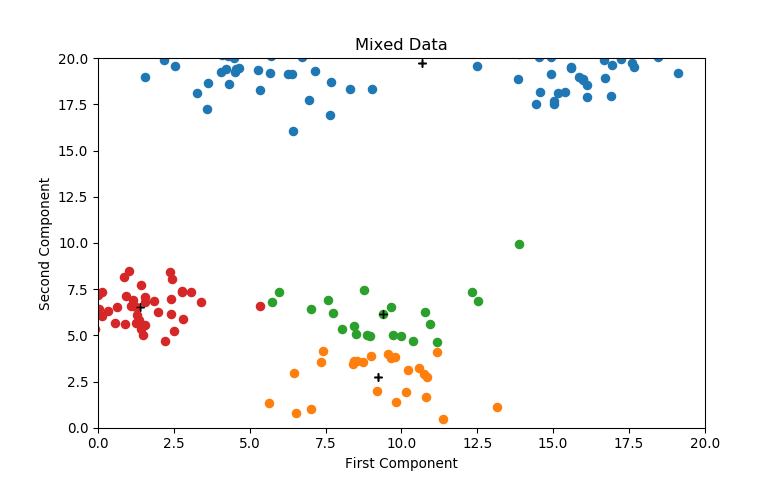

Initial number of groups: 4
Number of groups: 4
Group  1  - Number of elements: 91
Group  2  - Number of elements: 25
Group  3  - Number of elements: 22
Group  4  - Number of elements: 43


In [39]:
%matplotlib notebook

#######################
### USER DEFINITION ###
#######################

K = 4

######################
### END            ###
######################

# Run K-means
estPoints, grpPoints = k_means(genPoints[:,0:2], K, True)
# Get how many centers were found
K_ = np.size(estPoints[:,0])
# Show info
print("Initial number of groups:", K)
print("Number of groups:", K_)
for i in range(0,K_):
    print("Group ", i+1, " - Number of elements:", int(np.count_nonzero(grpPoints == i)))

# Determining the number of clusters in a data set

In [37]:
# Find the elbow or knee of a curve
def getKnee(values):
    #get coordinates of all the points
    nPoints = len(values)
    allCoord = np.vstack((range(nPoints), values)).T
    # get the first point
    firstPoint = allCoord[0]
    # get vector between first and last point - this is the line
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
    # find the distance from each point to the line:
    # vector between all points and first point
    vecFromFirst = allCoord - firstPoint
    # To calculate the distance to the line, we split vecFromFirst into two 
    # components, one that is parallel to the line and one that is perpendicular 
    # Then, we take the norm of the part that is perpendicular to the line and 
    # get the distance.
    # We find the vector parallel to the line by projecting vecFromFirst onto 
    # the line. The perpendicular vector is vecFromFirst - vecFromFirstParallel
    # We project vecFromFirst by taking the scalar product of the vector with 
    # the unit vector that points in the direction of the line (this gives us 
    # the length of the projection of vecFromFirst onto the line). If we 
    # multiply the scalar product by the unit vector, we have vecFromFirstParallel
    scalarProduct = np.sum(vecFromFirst * np.tile(lineVecNorm, (nPoints, 1)), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel
    # distance to line is the norm of vecToLine
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
    # knee/elbow is the point with max distance value
    return np.argmax(distToLine)

# Return variance
def variance(AGenPoints, AEstPoints, AGrpPoints):
    N = np.size(AGenPoints[:,0])
    aux = np.zeros([N,1])
    for i in range(0,N):
        dist=AGenPoints[i,:]-AEstPoints[int(AGrpPoints[i]),:]
        dist=np.dot(dist.T,dist)
        dist=np.sqrt(dist)
        aux[i]=dist
    return np.var(aux)

## Let's see

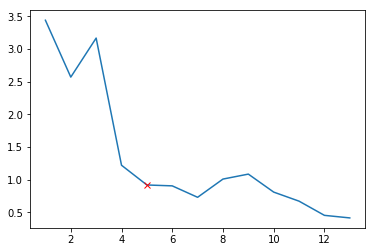

In [29]:
%matplotlib inline

#######################
### USER DEFINITION ###
#######################

N_fail=100
K_max =10000

######################
### END            ###
######################

arrKVar = []
ok=True;
i=0
# Try for K centers until it is possible of reach K_max
while((ok==True) and (i<K_max)):
    K_=i+1
    count_fail=0
    ok=False;
    # Try for K centers until it is possible of reach the maximum number of tries
    while((ok==False) and (count_fail<N_fail)):
        estPoints, grpPoints = k_means(genPoints[:,0:2], K_, False)
        ok = (np.size(estPoints[:,0])==K_)
        if (ok==False):
            count_fail=count_fail+1
    # Calculate variance
    if (ok==True):
        arrKVar=np.concatenate((arrKVar, [K_, variance(genPoints[:,0:2], estPoints, grpPoints)]))
    i=i+1
arrKVar = arrKVar.reshape(int(np.size(arrKVar)/2),2)
# Find the elbow or knee of a curve
iK = getKnee(arrKVar[:,1].T)
# Show info
plt.plot(arrKVar[:,0], arrKVar[:,1])
plt.plot(arrKVar[iK,0], arrKVar[iK,1], 'rx')
plt.show()

# Article
Kadir, R. A., Shima, Y., Sulaiman, R., & Ali, F. (2018). Clustering of public transport operation using K-means. In 2018 IEEE 3rd International Conference on Big Data Analysis (ICBDA) (pp. 427–432). IEEE.

Abstract — This paper describes a methodology for analysing the operation of transport buses, using a simplified generic approach. In recent years, location systems that utilize GPS data have become widespread, including their use for monitoring the operation of buses. In this paper, we simplify the bus routes, monitoring process, present new insights using K-means, and enhance their effectiveness. The primary focus of this work is data collection, subsequent data analysis and reporting, for use in schedule adjustments and resource allocation. The experimental data for this study is obtained from the operation of public transport buses at the main campus of Universiti Kebangsaan Malaysia (UKM), where several buses operate on a 30-minute interval over three different concurrent routes. The proposed approach to data analysis is based on three attributes of the data being collected, namely time, volume and quality. The effectiveness of the proposed approach described and discussed. 

In [41]:
# Define limits for initializing center and setting plot limits
limXYZ = np.array([[8,22],[3,16],[50,8*60]])

# Table containing identified atributes for each route:
# 1) Time, 2) Volume: Number of Stops, 3) Quality: Wait Period
data = [np.array([
                [8,16, 5*60+55],
                [9,4,  0*60+59],
                [10,16,6*60+26],
                [11,12,4*60+40],
                [12,11,4*60+38],
                [13,7, 1*60+13],
                [14,6, 1*60+40],
                [15,6, 1*60+12],
                [16,10,2*60+56],
                [17,5, 1*60],
                [18,6, 1*60+38],
                [19,5, 1*60+10],
                [20,9, 2*60+5],
                [21,4, 0*60+53],
                [22,3, 0*60+52]]),
        np.array([
                [8,3,  0*60+51],
                [9,15, 5*60+35],
                [10,17,6*60+40],
                [11,3, 0*60+50],
                [12,5, 1*60+43],
                [13,5, 1*60+40],
                [14,18,7*60+10],
                [15,13,4*60+34],
                [16,11,3*60+16],
                [17,10,4*60+54],
                [18,7, 2*60+18],
                [19,6, 1*60+12],
                [20,16,4*60+32],
                [21,7, 1*60+46],
                [22,12,3*60+33]]),
        np.array([
                [8,3,  1*60+14],
                [9,5,  1*60+55],
                [10,4, 0*60+59],
                [11,12,3*60+59],
                [12,6, 1*60+40],
                [13,10,2*60+19],
                [14,8, 2*60+32],
                [15,6, 1*60+39],
                [16,8, 2*60+21],
                [17,8, 2*60+20],
                [18,8, 3*60+23],
                [19,6, 1*60+15],
                [20,3, 1*60+7],
                [21,5, 1*60+17],
                [22,8, 2*60+55]])]
# Number of routes
M = 3
# Number of groups (centers)
K = 3
# Agroup data for each route
for i in range(0,M):
    dt=np.copy(data[i])
    ok=False
    while(ok==False):
        estPoints, grpPoints = k_means(dt, K, False)
        K_=np.size(estPoints[:,0])
        ok = (K_==K)
    # Display info
    for i in range(0,K_):
        print("Group ", i+1, ": ", int(np.count_nonzero(grpPoints == i)), "elements")
    d = {'Group' : pd.Series((grpPoints.T).tolist()[0], index=dt[:,0].T),
         'Stops' : pd.Series(dt[:,1].T, index=dt[:,0].T),
         'Time' : pd.Series(dt[:,2].T, index=dt[:,0].T)}
    df = pd.DataFrame(d)
    df = df.sort_values(['Group'], ascending=[1])
    print(df)
    print()

Group  1 :  2 elements
Group  2 :  2 elements
Group  3 :  11 elements
    Group  Stops  Time
11    0.0     12   280
12    0.0     11   278
8     1.0     16   355
10    1.0     16   386
9     2.0      4    59
13    2.0      7    73
14    2.0      6   100
15    2.0      6    72
16    2.0     10   176
17    2.0      5    60
18    2.0      6    98
19    2.0      5    70
20    2.0      9   125
21    2.0      4    53
22    2.0      3    52

Group  1 :  2 elements
Group  2 :  7 elements
Group  3 :  6 elements
    Group  Stops  Time
10    0.0     17   400
14    0.0     18   430
8     1.0      3    51
11    1.0      3    50
12    1.0      5   103
13    1.0      5   100
18    1.0      7   138
19    1.0      6    72
21    1.0      7   106
9     2.0     15   335
15    2.0     13   274
16    2.0     11   196
17    2.0     10   294
20    2.0     16   272
22    2.0     12   213

Group  1 :  8 elements
Group  2 :  2 elements
Group  3 :  5 elements
    Group  Stops  Time
8     0.0      3    74
9     0.